In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d

In [2]:
df = pd.read_csv("currency_prediction_data_set.csv")
df.head()

,End Date,USD/INR,USD/PKR,USD/CNY,USD/KWD,USD/AED,USD/LKR,USD/CHF,USD/EUR,USD/ALL,...,USD/BZD,USD/XOF,USD/BTN,USD/BOB,USD/BWP,USD/BRL,USD/BND,USD/BGN,USD/BIF,USD/CVE
0,1/1/2011,45.2050,85.6676,6.59160,0.28145,3.67320,110.915,0.934500,0.747306,103.700,...,1.97435,489.980,44.6971,7.00790,6.45385,1.66019,1.28195,1.46345,"1,220.95",82.5984
1,1/2/2011,45.2050,85.6035,6.60160,0.28167,3.67300,110.920,0.934450,0.747568,103.680,...,1.97405,489.885,44.8255,7.00655,6.45266,1.66365,1.29335,1.47415,"1,230.00",82.3375
2,1/3/2011,45.2066,85.6710,6.59000,0.28101,3.67293,110.937,0.935010,0.750404,104.200,...,1.97485,492.675,44.6634,7.00970,6.65306,1.65293,1.28470,1.46705,"1,223.24",82.8517
3,1/4/2011,45.4522,85.6779,6.60783,0.28099,3.67296,110.871,0.941000,0.748935,103.675,...,1.97405,490.145,44.9445,7.00660,6.46936,1.65899,1.28470,1.46506,"1,224.60",82.6228
4,1/5/2011,45.8020,85.7852,6.59346,0.28146,3.67300,110.811,0.954595,0.755439,104.840,...,1.97500,495.775,45.2711,7.00925,6.51894,1.66848,1.29100,1.48106,"1,219.88",83.4945


In [3]:
df['End Date'] = pd.to_datetime(df['End Date'])
df['End Year'] = df['End Date'].dt.year
df

,End Date,USD/INR,USD/PKR,USD/CNY,USD/KWD,USD/AED,USD/LKR,USD/CHF,USD/EUR,USD/ALL,...,USD/XOF,USD/BTN,USD/BOB,USD/BWP,USD/BRL,USD/BND,USD/BGN,USD/BIF,USD/CVE,End Year
0,2011-01-01,45.2050,85.6676,6.59160,0.281450,3.67320,110.915,0.934500,0.747306,103.700,...,489.980,44.6971,7.00790,6.45385,1.66019,1.28195,1.46345,"1,220.95",82.5984,2011
1,2011-01-02,45.2050,85.6035,6.60160,0.281670,3.67300,110.920,0.934450,0.747568,103.680,...,489.885,44.8255,7.00655,6.45266,1.66365,1.29335,1.47415,"1,230.00",82.3375,2011
2,2011-01-03,45.2066,85.6710,6.59000,0.281010,3.67293,110.937,0.935010,0.750404,104.200,...,492.675,44.6634,7.00970,6.65306,1.65293,1.28470,1.46705,"1,223.24",82.8517,2011
3,2011-01-04,45.4522,85.6779,6.60783,0.280990,3.67296,110.871,0.941000,0.748935,103.675,...,490.145,44.9445,7.00660,6.46936,1.65899,1.28470,1.46506,"1,224.60",82.6228,2011
4,2011-01-05,45.8020,85.7852,6.59346,0.281460,3.67300,110.811,0.954595,0.755439,104.840,...,495.775,45.2711,7.00925,6.51894,1.66848,1.29100,1.48106,"1,219.88",83.4945,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2017-02-13,66.9680,104.8540,6.88424,0.305325,3.67294,150.755,1.004190,0.941389,127.591,...,616.590,66.9513,6.92383,10.50830,3.11522,1.42300,1.84083,"1,694.02",103.9540,2017
2236,2017-02-14,66.9391,105.0070,6.87124,0.305390,3.67293,150.940,1.005410,0.943329,127.747,...,618.423,66.8993,6.94726,10.51070,3.10619,1.42284,1.84526,"1,695.74",104.1590,2017
2237,2017-02-15,66.9185,105.0190,6.86931,0.305555,3.67299,150.959,1.007330,0.945877,128.107,...,619.922,66.8836,6.94199,10.45160,3.07767,1.42359,1.84990,"1,697.75",104.3580,2017
2238,2017-02-16,66.9856,104.5290,6.85916,0.305405,3.67293,150.279,1.001970,0.940578,127.386,...,617.808,67.0025,6.90679,10.35900,3.06212,1.41683,1.83921,"1,686.79",103.8860,2017


In [4]:
x = np.array(df.iloc[:, 0]) 
x= x.reshape(-1,1)
y = np.array(df.iloc[:, 1])
y = y.reshape(-1,1)

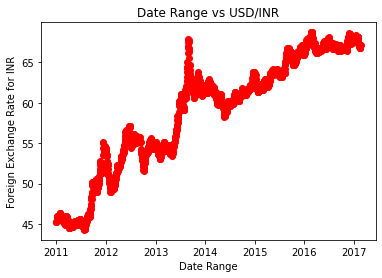

In [5]:
plt.scatter(x, y, color= 'red')
plt.title('Date Range vs USD/INR')
plt.xlabel('Date Range')
plt.ylabel('Foreign Exchange Rate for INR')
plt.show()

In [6]:
def normalize(a):
    min_val = np.min(a)
    max_val = np.max(a)
    a = (a-min_val) / (max_val-min_val)
    return a
y= normalize(y)
x= normalize(x)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

model= LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(y_predict)

print("R-squared of training data is: " + str(model.score(x_train, y_train)))
print("R-squared of testing data is: " + str(model.score(x_test, y_test)))

[[0.44583349]
 [0.27913588]
 [0.33085488]
 [0.77666414]
 [0.61381339]
 [0.62749115]
 [0.99208875]
 [0.95062806]
 [0.37573501]
 [0.43813975]
 [1.00405679]
 [0.926692  ]
 [0.44113176]
 [0.11543027]
 [0.55696523]
 [0.16415726]
 [0.59500648]
 [0.22314257]
 [0.47190671]
 [0.16672184]
 [0.61167625]
 [0.31290283]
 [0.93139372]
 [0.55910238]
 [0.52832744]
 [0.96216867]
 [0.92754685]
 [0.54029547]
 [0.62407171]
 [0.37787216]
 [0.65399179]
 [0.34752464]
 [0.97584642]
 [0.21587627]
 [0.42317971]
 [0.25605467]
 [0.71212224]
 [0.55183608]
 [0.39967107]
 [1.04509004]
 [0.72366285]
 [0.49840735]
 [0.33726633]
 [0.38471103]
 [0.4603661 ]
 [1.04252547]
 [0.87967472]
 [0.62364428]
 [0.30264451]
 [0.6612581 ]
 [0.14064863]
 [0.98824188]
 [0.35607324]
 [0.28511989]
 [0.46378554]
 [0.69630734]
 [0.53388403]
 [0.83180258]
 [0.90061878]
 [0.97670128]
 [0.60056307]
 [0.59030476]
 [0.95276521]
 [0.24237691]
 [1.03312201]
 [0.57149785]
 [0.23981234]
 [0.59073219]
 [0.44839807]
 [0.97798357]
 [0.7732447 ]
 [0.97

In [8]:
model= LinearRegression()
model.fit(x, y)
y_predict = model.predict(x)

print("R-squared of the entire dataset is: " + str(model.score(x, y)))

#train_test_split score of the training set is not significantly different from the score of the samples

R-squared of the entire dataset is: 0.9025838444042857


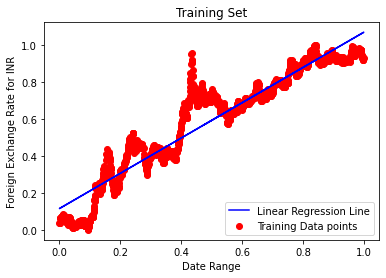

In [9]:
plt.scatter(x_train, y_train, color = 'red') #Plotting Training Data points
plt.plot(x_train, model.predict(x_train), color = 'blue') #Plotting Linear Regression Line
plt.title('Training Set')
plt.xlabel('Date Range')
plt.ylabel('Foreign Exchange Rate for INR')
plt.legend(['Linear Regression Line','Training Data points'])
plt.show()

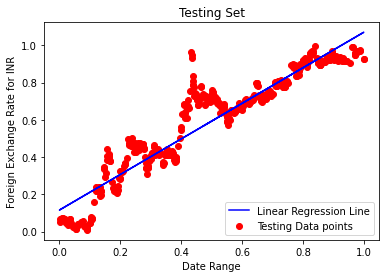

In [10]:
plt.scatter(x_test, y_test, color = 'red') #Plotting Testing Data points
plt.plot(x_train, model.predict(x_train), color = 'blue') #Plotting Linear Regression Line
plt.title('Testing Set')
plt.xlabel('Date Range')
plt.ylabel('Foreign Exchange Rate for INR')
plt.legend(['Linear Regression Line','Testing Data points'])
plt.show()

In [11]:
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)

0.902583844378429
0.9024416292509452


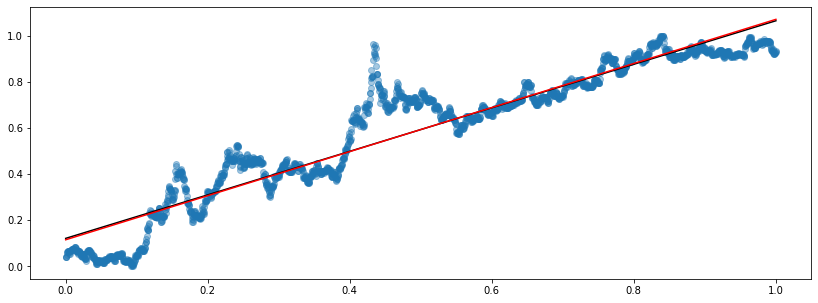

In [12]:
ridge = Ridge(alpha=0.001)
ridge.fit(x, y)

y_ridge = ridge.predict(x)
print(ridge.score(x, y))

lasso = Lasso(alpha=0.001)
lasso.fit(x, y)

y_lasso = lasso.predict(x)
print(lasso.score(x, y))
 
plt.figure(figsize=(14,5))
plt.scatter(x, y, alpha=0.4)
plt.plot(x, y_lasso, color='black')
plt.plot(x, y_ridge, color='r')
plt.show()

Mean Error for k= 2 [0.23677357751546096]
Variance for k= 2 [0.01997809551717812] 

Mean Squared Error:  0.3316052610682118 

Mean Squared Error:  0.05017929588042765 

Mean Squared Error:  0.018662897722008114 

Mean Squared Error:  0.05828336979777382 

Mean Squared Error:  0.18482176567675687 

Mean Error for k= 5 [0.23677357751546096, 0.12871051802903566]
Variance for k= 5 [0.01997809551717812, 0.11623455911294116] 

Mean Error for k= 10 [0.23677357751546096, 0.12871051802903566, 0.10347588601936686]
Variance for k= 10 [0.01997809551717812, 0.11623455911294116, 0.10577320572430177] 

Mean Error for k= 25 [0.23677357751546096, 0.12871051802903566, 0.10347588601936686, 0.09130419319287762]
Variance for k= 25 [0.01997809551717812, 0.11623455911294116, 0.10577320572430177, 0.09463973810844194] 

Mean Error for k= 50 [0.23677357751546096, 0.12871051802903566, 0.10347588601936686, 0.09130419319287762, 0.08789794187753248]
Variance for k= 50 [0.01997809551717812, 0.11623455911294116, 0.10

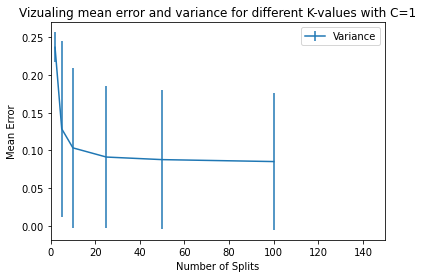

Scores:  [-0.33160526 -0.0501793  -0.0186629  -0.05828337 -0.18482177] 

Accuracy: -0.13 (+/− 0.12) 



In [13]:
#K-fold cross validation and plotting Error, Variance with range of K values
mean_error=[]; std_error=[]
kf_range = [2, 5, 10, 25, 50, 100]
Ci=1

for n_splits in kf_range:
    temp=[]
    kf = KFold(n_splits)
    for train, test in kf.split(x_poly):
        model = Lasso(alpha=1/(2*Ci)).fit(x_poly[train], y[train]) #Change Lasso with Ridge for Ridge Outcomes
        ypred = model.predict(x_poly[test])
        temp.append(mean_squared_error(y[test],ypred))
        if(n_splits==5):
            print("Mean Squared Error: ", mean_squared_error(y[test],ypred),"\n")
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
        
    print("Mean Error for k=",n_splits, mean_error)
    print("Variance for k=", n_splits, std_error, "\n")
    
plt.errorbar(kf_range,mean_error,yerr=std_error)
plt.title("Vizualing mean error and variance for different K-values with C=1")
plt.xlabel("Number of Splits"); plt.ylabel("Mean Error")
plt.legend(["Variance", "Mean Error"])
plt.xlim((0,150))
plt.show()

scores = cross_val_score(model, x_poly, y, cv=5, scoring='neg_mean_squared_error')
print("Scores: ", scores, "\n")
print("Accuracy: %0.2f (+/− %0.2f)" % (scores.mean(), scores.std()), "\n")

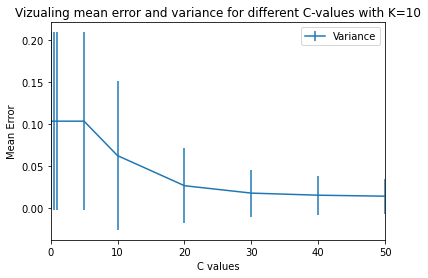

In [14]:
#Plotting mean error and variance for different C-values with K=10
mean_error=[]; std_error=[]
Ci_range = [0.1, 0.5, 1, 5, 10, 20, 30, 40, 50]

for Ci in Ci_range:
    temp=[]
    kf = KFold(n_splits=10)
    for train, test in kf.split(x_poly):
        model = Lasso(alpha=1/(2*Ci)).fit(x_poly[train], y[train]) #Change Lasso with Ridge for Ridge outcomes
        ypred = model.predict(x_poly[test])
        temp.append(mean_squared_error(y[test],ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
    
plt.errorbar(Ci_range,mean_error,yerr=std_error)
plt.title("Vizualing mean error and variance for different C-values with K=10")
plt.xlabel("C values"); plt.ylabel("Mean Error")
plt.legend(["Variance", "Mean Error"])
plt.xlim((0,50))
plt.show()